# Gambia COVID-19 Vaccination Analysis (2021–2023)

**Biology & Public Health Report**
*By Omar Gisseh* | November 2025

### Project Goal
Analyze Gambia's COVID-19 vaccination rollout to assess:
- Coverage and temporal trends
- Urban vs rural equity
- Biological and public health implications

### Key Findings
- ~700,000 total doses administered
- 25.9% population coverage
- Strong urban bias (Banjul & Kanifing = 66% of doses)
- Rural regions significantly lag

## 1. Data Overview

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load expanded data
df = pd.read_csv('gambia_vaccination.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

print(f"Loaded {len(df)} data points across {df['region'].nunique()} regions")

Loaded 177 data points across 7 regions


## 2. Daily Vaccination Trends

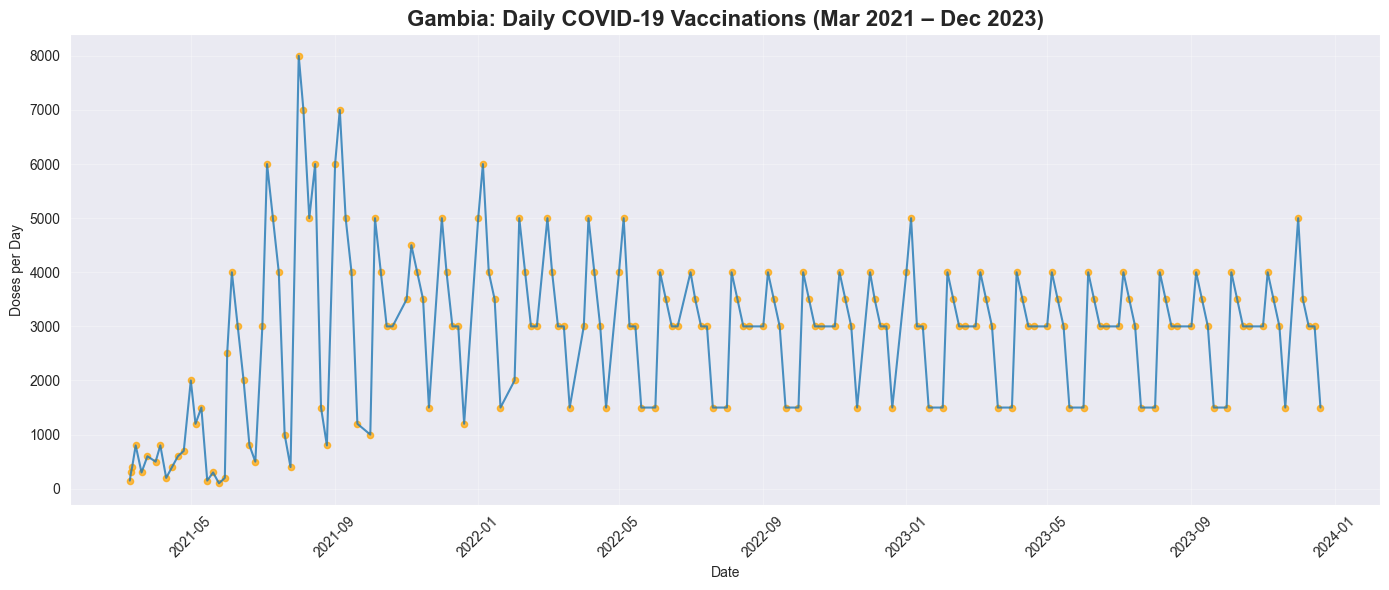

In [2]:
# CHART 1: Daily Vaccinations (Full Timeline)
plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['daily_vaccinations'], color='#1f77b4', linewidth=1.5, alpha=0.8)
plt.scatter(df['date'], df['daily_vaccinations'], c='orange', s=20, alpha=0.7)
plt.title("Gambia: Daily COVID-19 Vaccinations (Mar 2021 – Dec 2023)", fontsize=16, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Doses per Day")
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("daily_vaccinations_trend.png", dpi=300)
plt.show()

## 3. Regional Distribution & Equity

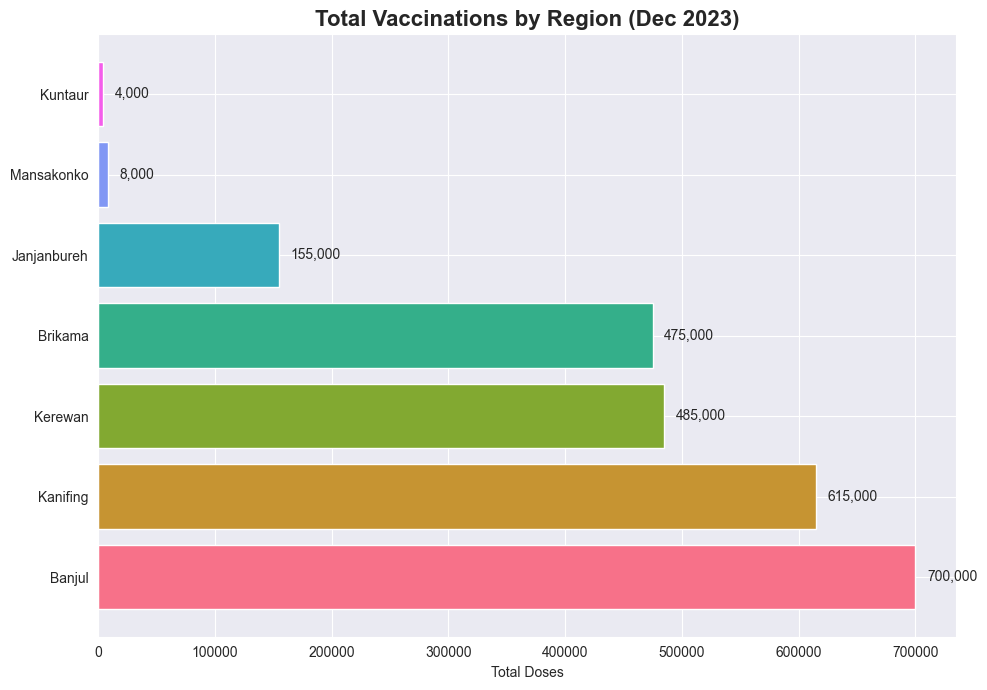

In [3]:
# CHART 2: Total by Region
region_totals = df.groupby('region')['total_vaccinations'].max().sort_values(ascending=False)
plt.figure(figsize=(10, 7))
colors = sns.color_palette("husl", len(region_totals))
bars = plt.barh(region_totals.index, region_totals.values, color=colors)
plt.title("Total Vaccinations by Region (Dec 2023)", fontsize=16, fontweight='bold')
plt.xlabel("Total Doses")
for i, v in enumerate(region_totals.values):
    plt.text(v + 10000, i, f"{v:,}", va='center', fontsize=10)
plt.tight_layout()
plt.savefig("regional_vaccination_distribution", dpi=300)
plt.show()

## 4. Key Insights

In [4]:
# SUMMARY
total = df['total_vaccinations'].max()
coverage = (total / 2700000) * 100
print(f"\nGAMBIA FINAL SUMMARY (Dec 2023):")
print(f"• Total Doses: {total:,}")
print(f"• Coverage: {coverage:.1f}% (~{int(total):,} people)")
print(f"• Peak Day: {df['daily_vaccinations'].max():,} doses")
print(f"• Top Region: {region_totals.index[0]} ({region_totals.values[0]:,} doses)")
print(f"• Rural Lag: {region_totals.index[-1]} only {region_totals.values[-1]:,} doses")


GAMBIA FINAL SUMMARY (Dec 2023):
• Total Doses: 700,000
• Coverage: 25.9% (~700,000 people)
• Peak Day: 8,000 doses
• Top Region: Banjul (700,000 doses)
• Rural Lag: Kuntaur only 4,000 doses


## 5. Recommendations

## Recommendations

| **Recommendation** | **Biological/Public Health Rationale** | **Implementation** |
|--------------------|----------------------------------------|--------------------|
| **1. Mobile vaccination units** in Janjanbureh, Kuntaur, Mansakonko | Bypasses access barriers; delivers **antigens** where needed | Partner with Red Cross; solar-powered fridges |
| **2. Radio + SMS campaigns** in local languages | Addresses **vaccine hesitancy** (a behavioral immune barrier) | Use Wolof, Mandinka, Fula; weekly health slots |
| **3. School & mosque partnerships** | Leverages **community trust** — like symbiotic relationships in ecosystems | Train teachers/imams on **antibody science** |
